##### **Montando nuestro directorio de Drive**

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/My Drive/DATASETS/GAN"

Mounted at /content/gdrive
/content
/content/gdrive/My Drive/DATASETS/GAN


##### **Importando librerías**

In [3]:
# generales:
import os
import numpy as np
import tensorflow as tf

print('tensorflow version', tf.__version__)

tensorflow version 2.4.1


In [4]:
# para las redes neuronales:
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Conv2D, BatchNormalization, Dropout, Flatten
from keras.layers import Activation, Reshape, Conv2DTranspose, UpSampling2D # new!
from keras.optimizers import RMSprop, SGD

In [5]:
# para plotting:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

##### **Cargando el modelo de la red generadora entrenada**

In [39]:
generator = load_model('generator_model.h5')
generator.summary()

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              103488    
_________________________________________________________________
batch_normalization_4 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_4 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 64)        0 

**Definimos una función para generar espacios latentes** 

In [40]:
def generateLatentSpace(z_dim=32, batch=128):
    # generamos el espacio latente
    return np.random.uniform(-1.0, 1.0, size=[batch, z_dim])

In [ ]:
# interpolación entre dos puntos del espacio latente
def interpolatePoints(p1, p2, steps=10):
    # interpolate ratios between the points
    ratios = np.linspace(0, 1, num=steps)
    # linear interpolate vectors
    vectors = []
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return np.asarray(vectors)

**Definimos una función para generar imágenes falsas a partir de la red generadora** 

In [ ]:
# generamos el espacio latente
space = generateLatentSpace()
# interpolamos dos puntos del espacio latente
inter = interpolatePoints(space[0], space[1])

print('latent space dims;', space.shape)
print('latent space generated by interpolation dims:', inter.shape)

latent space dims; (128, 32)
latent space generated by interpolation dims: (10, 32)


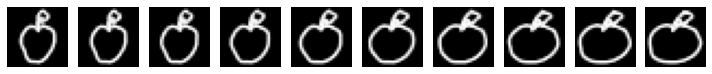

In [ ]:
# generar imagenes a partir del espacio generado por interpolación 
imgs = generator.predict(inter)

instances = 10
plt.figure(figsize=(10, 10))
for k in range(instances):
  plt.subplot(1, instances,  k+1)
  plt.imshow(imgs[k, :, :, 0], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()